Linear regression it is a process in which you try to find a line which would best fit the data points that are available on a plot. This way we can use it to predict the output values for inputs that are not in the data set.

In [3]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

df = pd.read_csv('data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [27]:
colums = ["weekday_is_monday","weekday_is_tuesday", "weekday_is_wednesday","weekday_is_thursday", "weekday_is_friday"]
shares = ["shares"]
df1 = df.loc[:,colums+shares]
df1

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,shares
0,0,1,0,0,0,2100
1,1,0,0,0,0,274
2,0,0,0,0,1,1500
3,0,0,0,1,0,2000
4,0,1,0,0,0,6000
...,...,...,...,...,...,...
24994,0,0,1,0,0,8500
24995,1,0,0,0,0,675
24996,0,0,0,0,0,1500
24997,0,0,0,1,0,817


I created a new variable that called colums in which I put the five dummy variables. I created a new dataset in combination with the share log which is no called df1

In [28]:
training = df.loc[0:19999,colums+shares]
training

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,shares
0,0,1,0,0,0,2100
1,1,0,0,0,0,274
2,0,0,0,0,1,1500
3,0,0,0,1,0,2000
4,0,1,0,0,0,6000
...,...,...,...,...,...,...
19995,0,0,1,0,0,1200
19996,0,0,0,1,0,5400
19997,1,0,0,0,0,1700
19998,1,0,0,0,0,678


In [29]:
import numpy as np
test = df.loc[20000:25000,colums + shares]
test.index = np.arange(len(test)) 
test

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,shares
0,0,1,0,0,0,789
1,0,1,0,0,0,10100
2,0,0,0,1,0,1200
3,0,0,0,1,0,1600
4,0,0,1,0,0,1000
...,...,...,...,...,...,...
4994,0,0,1,0,0,8500
4995,1,0,0,0,0,675
4996,0,0,0,0,0,1500
4997,0,0,0,1,0,817


In [30]:
x = training[colums]
y = training["shares"] 
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.intercept_ 
b1 = lm.coef_[0]
b2 = lm.coef_[1] 
b3 = lm.coef_[2] 
b4 = lm.coef_[3] 
b5 = lm.coef_[4] 

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X1 + {b2:.2f}X2  + {b3:.2f}X3  + {b4:.2f}X4  + {b5:.2f}X5 ") 

The regression line is equal to y = 3969.05 + 0.94X1 + -734.35X2  + -465.75X3  + -706.62X4  + -485.82X5 


y = 3.37 + -0.12X1 + -0.14X2  + -0.14X3  + -0.14X4  + -0.11X5 

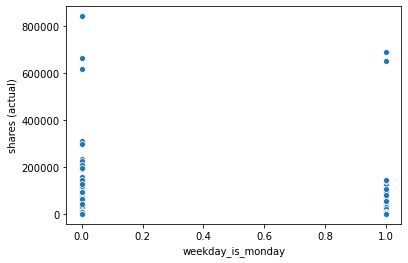

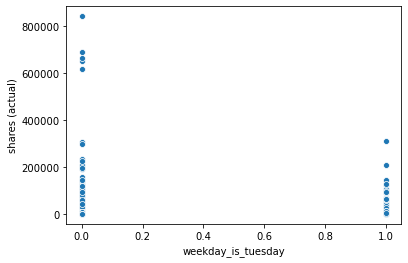

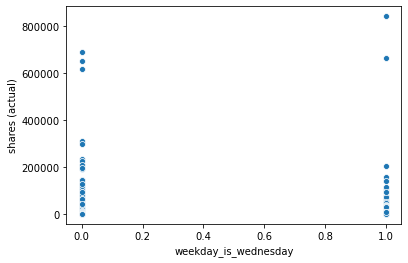

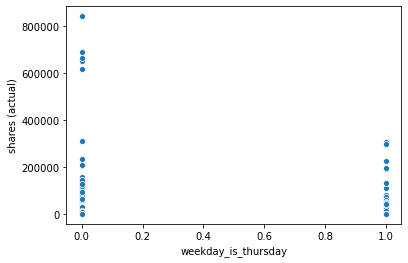

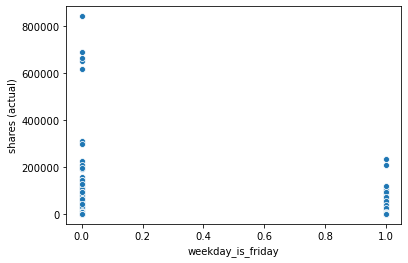

In [35]:
for feature in colums:
    sns.scatterplot(x=feature,y='shares',data=df)
    plt.xlabel(feature)
    plt.ylabel('shares (actual)')
    plt.show()

It gives strange scatterplots which makes me believe the relation between both variables are not that interesting. even creating a line would do no good in this case. I probably did it wrong since it does not really give much insights in my opinion 

In [36]:
resultList = []
for i in range(len(test)): 
    prediction = b0 + b1*test.loc[i,colums[0]] + b2*test.loc[i,colums[1]] + b3*test.loc[i,colums[2]] + b4*test.loc[i,colums[3]] + b5*test.loc[i,colums[4]]
    resultList.append(prediction)

In [38]:
results = test.copy()  
results["shares_p"] = pd.DataFrame(resultList)

In [44]:
r2_score(results['shares'], results['shares_p'])


-0.0005171589410333244

In [45]:
math.sqrt(mean_squared_error(results['shares'], results['shares_p']))

12140.912690580326

In [57]:
df["resid"] = df["shares"] - results["shares_p"]
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log,resid
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219,-1134.696774
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751,-2960.696774
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091,-1762.425820
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030,-1262.425820
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151,2496.702384


In [63]:
#residual = shares["shares_p"] - shares["shares"] #Subtracting Y'-Y (Y' = predicted) gets us the residual
#sns.scatterplot(x='shares_p',y='shares',data=df)
#plt.xlim(0, 1400000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
#plt.ylim(0, 1400000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
#plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
#plt.xlabel('shares')
#plt.ylabel('shares (predicted)')
#plt.show()


In [ ]:
I was not able to make this residual work. It kept saying that shares_p is not working. I tried with results["shares_p"] end df['shares'] but still got the error that shares_p is not found. 